<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/Bone_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## allows loading of operating system
import os
## allows loading of image dataset
import cv2
## for plotting
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
## for array
import numpy as np
## allows selection of any images
import random
## helps in resizing of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [4]:
## fucntion to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')

In [5]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer', 'Unlabeled']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['cancer', 'normal']


In [6]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory,d))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [7]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 21144 images belonging to 3 classes.
found 881 images belonging to 2 classes.
found 881 images belonging to 2 classes.


## loading the train dataset

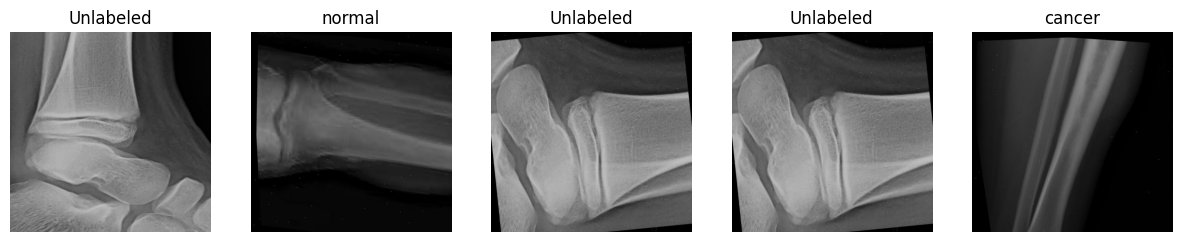

In [8]:


# Get classes (subfolders)
classes = [d for d in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    ## selecting image at random from the train dataset
    class_name = random.choice(classes)
    ##  class_path allows train_dataset to join with the class (normal,cancer,unlabled)
    class_path = os.path.join(train_dataset, class_name)
    ## allows images to be selected at random from the class_path
    image_file = random.choice(os.listdir(class_path))
    ## joins image with the image file e.g (normal associate with normal and cancer associate with cancer)
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


## checking images in the test dataset

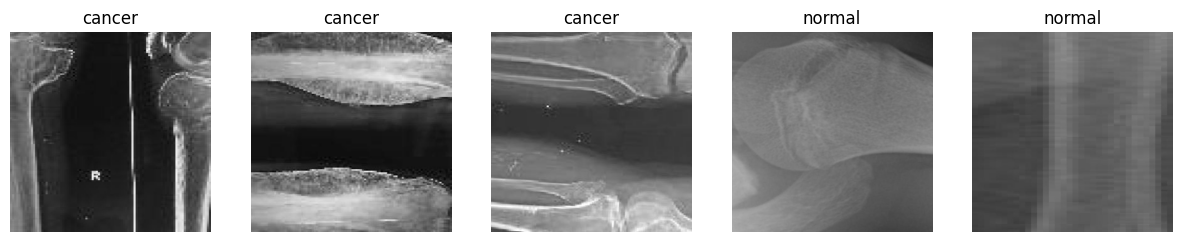

In [9]:


# Get classes (subfolders)
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    ## selecting image at random from the train dataset
    class_name = random.choice(classes)
    ##  class_path allows train_dataset to join with the class (normal,cancer,unlabled)
    class_path = os.path.join(test_dataset, class_name)
    ## allows images to be selected at random from the class_path
    image_file = random.choice(os.listdir(class_path))
    ## joins image with the image file e.g (normal associate with normal and cancer associate with cancer)
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


## valid dataset

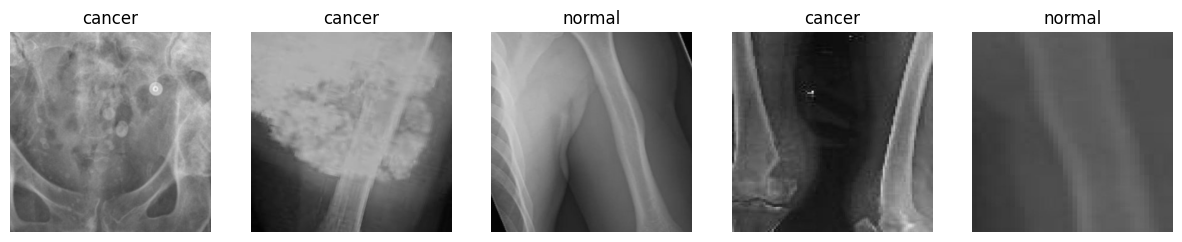

In [10]:


# Get classes (subfolders)
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    ## selecting image at random from the train dataset
    class_name = random.choice(classes)
    ##  class_path allows train_dataset to join with the class (normal,cancer,unlabled)
    class_path = os.path.join(valid_dataset, class_name)
    ## allows images to be selected at random from the class_path
    image_file = random.choice(os.listdir(class_path))
    ## joins image with the image file e.g (normal associate with normal and cancer associate with cancer)
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


## Exploratory data analysis (EDA)
visualization of the train

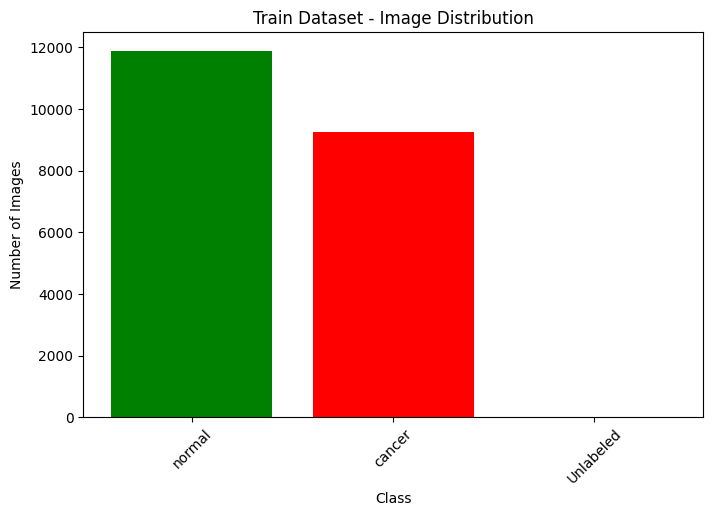

In [12]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



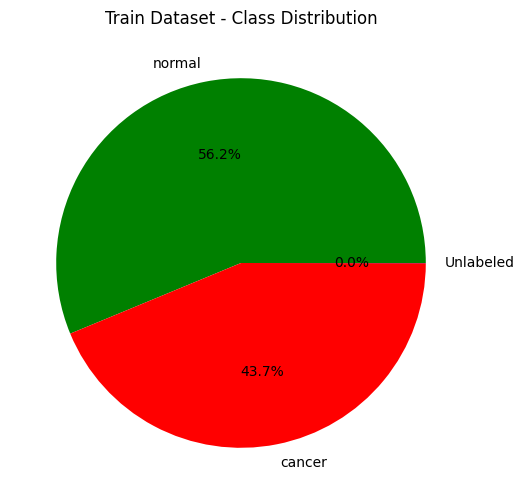

In [13]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

## visualization of test dataset

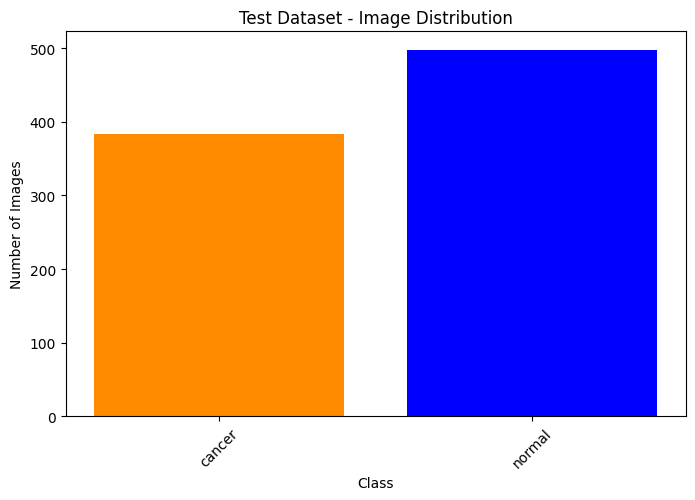

In [18]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



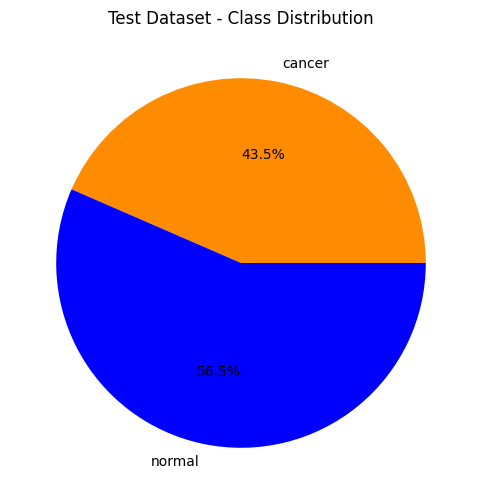

In [19]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

## Visualizing the validation dataset

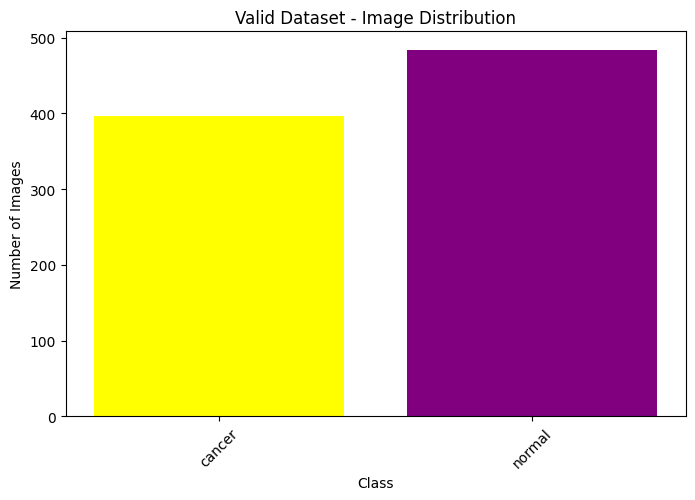

In [20]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



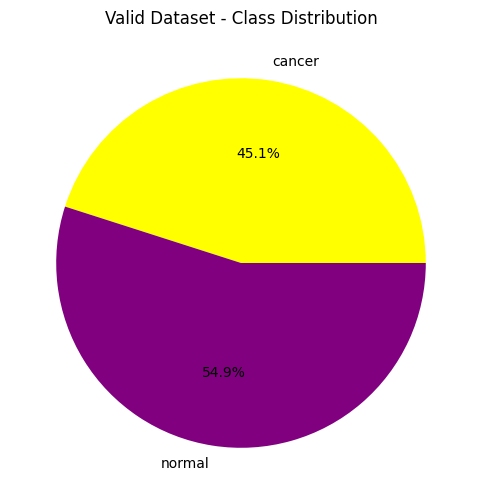

In [21]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()